# Classical Simulation Of Grover's Algorithm

In [1]:
import math
import random
import matplotlib.pyplot as plt
plots = []

In [2]:
def superposition(qubits):
    states = []
    #Hadamard Transformation
    total_states = int(math.pow(2,qubits))
    amplitude = 1/math.sqrt(total_states)
    for _ in range(0,total_states):
        states.append(amplitude)
    return states

In [3]:
def grover_diffusion(states):
    average = sum(states)/len(states)
    for i in range(0,len(states)):
        states[i] = (average-states[i]) + average
    return states


In [4]:
def oracle(states,datalist,key):

    for i in range(0,int(len(datalist))):
        if datalist[i] == key:
            states[i] *= -1 #phase inversion
    return states

In [5]:
def grover_search(qubits,datalist,key):
    states = superposition(qubits)
    num_iterations  = math.ceil(math.sqrt(math.pow(2,qubits)))
    probability_states = []
    for _ in range(0,num_iterations):
        states = oracle(states,datalist,key)
        states = grover_diffusion(states)
        probability_states = [states[i]*states[i] for i in range(0,len(states))]
        plots.append(probability_states)
    return probability_states

In [6]:
def grover(datalist,key):
    size_datalist = len(datalist)
    qubits_needed = math.ceil(math.log(size_datalist,2))
    paddings_required = int(math.pow(2,qubits_needed) - size_datalist)
    for _ in range(0,paddings_required):
         datalist.append(0)
    grover_search(qubits_needed,datalist,key)

[36, 28, 72, 86, 6, 32, 54, 3, 67, 29, 87, 42, 26, 35, 9, 57, 98, 91, 16, 46, 63, 52, 65, 93, 78, 10, 25, 74, 1, 76, 40, 12, 43, 23, 27, 61, 88, 2, 8, 81, 68, 17, 30, 18, 89, 37, 95, 51, 73, 75, 69, 34, 14, 38, 79, 60, 19, 96, 85, 55, 77, 20, 80, 4]


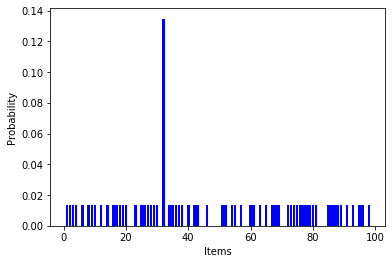

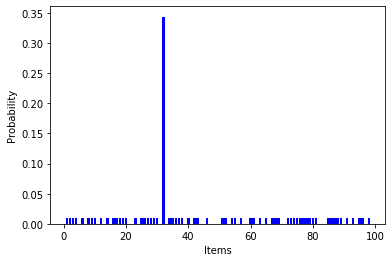

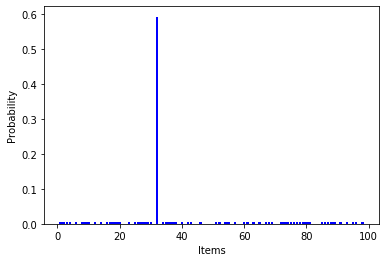

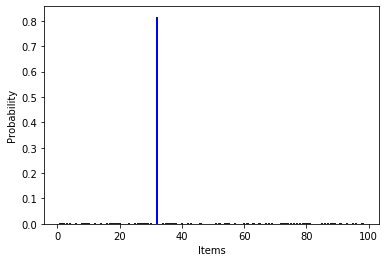

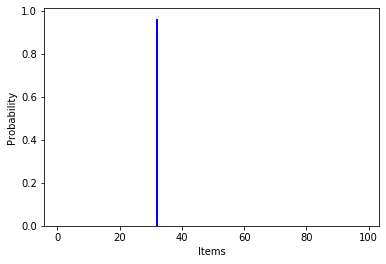

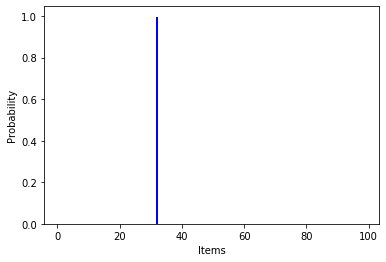

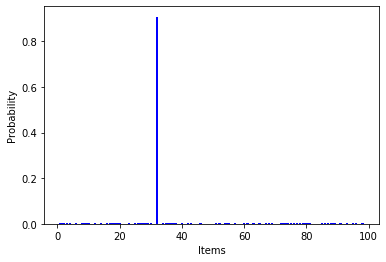

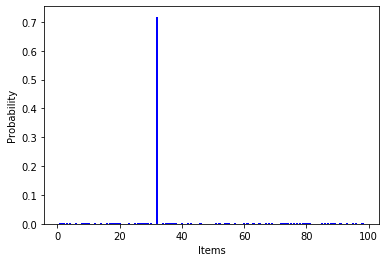

In [7]:
datalist = random.sample(range(1, 100), 64)
grover(datalist,32)
print(datalist)
result ={}
for plot in plots:
    for i in range(len(plot)):
        result[datalist[i]] = plot[i]
    plt.bar(result.keys(), result.values(),color='b') 
    plt.ylabel("Probability")
    plt.xlabel("Items")  
    plt.show()